# Assignment 3: Steller Classification

### Prerequisites

In [159]:
#Loading Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.inspection import permutation_importance
from sklearn.inspection import partial_dependence

## Exploratory Data Analysis (EDA)

In [90]:
#Load Steller data
df=pd.read_csv('C:/Users/Mariam/Desktop/Maryam_Python/dsi_2022-02/star_classification.csv')


In [ ]:
#View the data
df.head()

In [ ]:
#Basic information
df.info()

In [161]:
#Describe the data
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


##### Descriptive statistics

In [160]:
#Describe the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
obj_ID,100000.0,1.237665e+18,8.438560e+12,1.237646e+18,1.237659e+18,1.237663e+18,1.237668e+18,1.237681e+18
alpha,100000.0,1.776291e+02,9.650224e+01,5.527828e-03,1.275182e+02,1.809007e+02,2.338950e+02,3.599998e+02
delta,100000.0,2.413530e+01,1.964467e+01,-1.878533e+01,5.146771e+00,2.364592e+01,3.990155e+01,8.300052e+01
u,100000.0,2.198047e+01,3.176929e+01,-9.999000e+03,2.035235e+01,2.217914e+01,2.368744e+01,3.278139e+01
g,100000.0,2.053139e+01,3.175029e+01,-9.999000e+03,1.896523e+01,2.109983e+01,2.212377e+01,3.160224e+01
r,100000.0,1.964576e+01,1.854760e+00,9.822070e+00,1.813583e+01,2.012529e+01,2.104478e+01,2.957186e+01
i,100000.0,1.908485e+01,1.757895e+00,9.469903e+00,1.773228e+01,1.940514e+01,2.039650e+01,3.214147e+01
z,100000.0,1.866881e+01,3.172815e+01,-9.999000e+03,1.746068e+01,1.900460e+01,1.992112e+01,2.938374e+01
run_ID,100000.0,4.481366e+03,1.964765e+03,1.090000e+02,3.187000e+03,4.188000e+03,5.326000e+03,8.162000e+03
rerun_ID,100000.0,3.010000e+02,0.000000e+00,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02


In [24]:
# No. of rows & colomns
df.shape

(100000, 18)

In [ ]:
#Find the duplicates

df.duplicated().sum()

#### ‘0’ means, there is not a single duplicate value present in our dataset

In [ ]:
#Find null values
df.isna().sum()

#### No missing values detected in the dataset

In [ ]:
plt.pie(df['class'].value_counts(),autopct="%1.1f%%",labels=['GALAXY','STAR','QSO'])
plt.legend();

In [26]:
#Datatypes
df.dtypes

obj_ID         float64
alpha          float64
delta          float64
u              float64
g              float64
r              float64
i              float64
z              float64
run_ID           int64
rerun_ID         int64
cam_col          int64
field_ID         int64
spec_obj_ID    float64
class           object
redshift       float64
plate            int64
MJD              int64
fiber_ID         int64
dtype: object

In [14]:
df.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

### Categorical Feature Analysis

In [33]:
#Categorical Feature Analysis
df['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

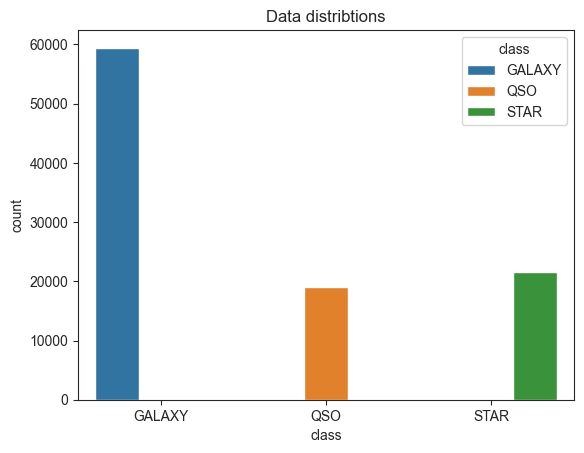

In [157]:
#Data distribtions for each class 
categorical_list = ["class"]
df_categoric = df.loc[:, categorical_list]
for i in categorical_list:
    plt.figure()
    sns.countplot(x = i, data = df_categoric,hue = "class")
    plt.title('Data distribtions')

#### We can observe from the class distribution above that the data is imbalanced

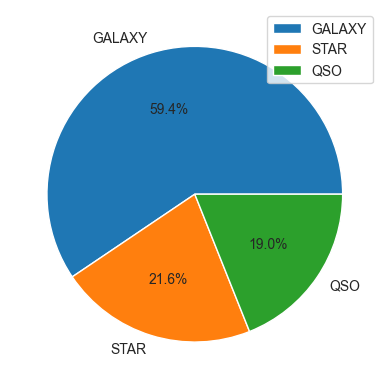

In [158]:
#prpotion of the different classes
plt.pie(df['class'].value_counts(),autopct="%1.1f%%",labels=['GALAXY','STAR','QSO'])
plt.legend();

#### From the chart above we can see that majority class are Galaxies with 59%, then Stars with arround 22% and only 19% of data are classified as QSOs.

### Numerical Feature Analysis

In [ ]:
# Numerical Feature Analysis - 
numeric_list = ["obj_ID", "alpha","delta","u","g","r","i","z","run_ID","rerun_ID","cam_col","field_ID","spec_obj_ID","redshift","plate","MJD","fiber_ID"]
df_numeric = df.loc[:, numeric_list]
df_numeric.head()


#### Univariate Analysis - Redshift feature

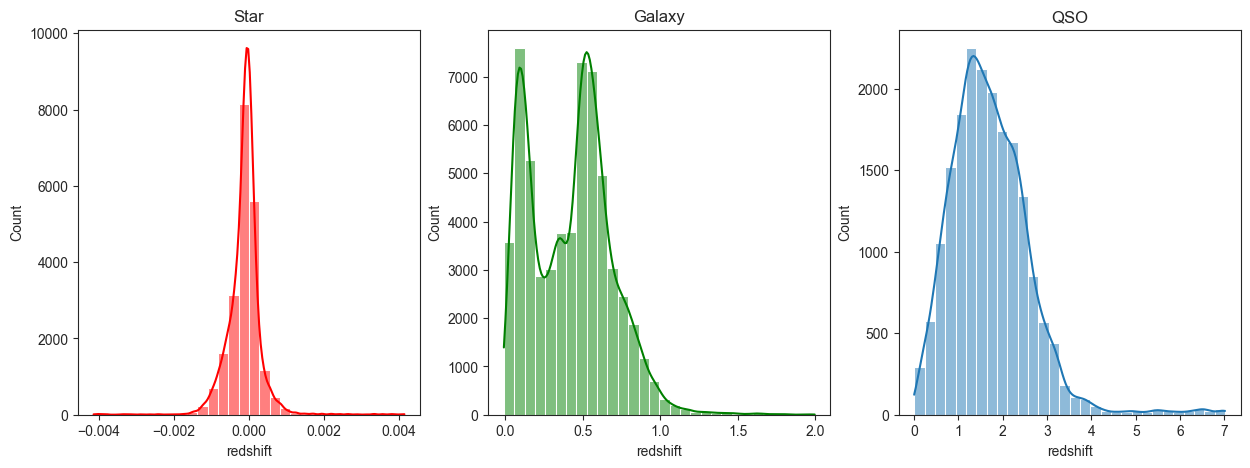

In [176]:
#Redshift Demonstration - As the source moves away, the light loses energy and its frequency is decreased and it appears red. 

fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(15, 5))
ax = sns.histplot(df[df['class']=='STAR'].redshift,color='red', bins = 30, ax = axes[0], kde =True)
ax.set_title('Star')
ax = sns.histplot(df[df['class']=='GALAXY'].redshift,color='green' ,bins = 30, ax = axes[1], kde =True)
ax.set_title('Galaxy')
ax = sns.histplot(df[df['class']=='QSO'].redshift, bins = 30, ax = axes[2], kde =True)
ax = ax.set_title('QSO')

##### We can observe that there are differentiation in redshift values for each class
* For Star we can see that the distribution looks like a normal distribution
* For Galaxy we can see that the distribution bimodal distribution
* For QSO we can see that the distribution right skewed distribution
##### The histplot indicates that the majority of the observed stars are not as far away from Earth as galaxies or quasars. Therfor, from using only the'redshift' column, we can easily differentiate between the different classes.

#### Multivariate Analysis - Filter band u,g,r,i,z features

In [185]:
# In astronomy, a photometric system is a set of well-defined passbands (or optical filters), with a known sensitivity to incident radiation. 
# The sensitivity usually depends on the optical system, detectors and filters used.
# Photometric systems are usually characterized according to the widths of their passbands which are used to capture the observations.
filterbands = df.iloc[:,3:8]
annot = True
hm = sns.heatmap(data=filterbands,annot=annot)
plt.show()